# Régression
Création d'un jeu de données aléatoires Y = a X +b+bruit

In [1]:
import numpy as np
m = 100 
X=2*np.random.rand(m,1)
a=5
b=4
y=a*X+b+np.random.randn(m,1)

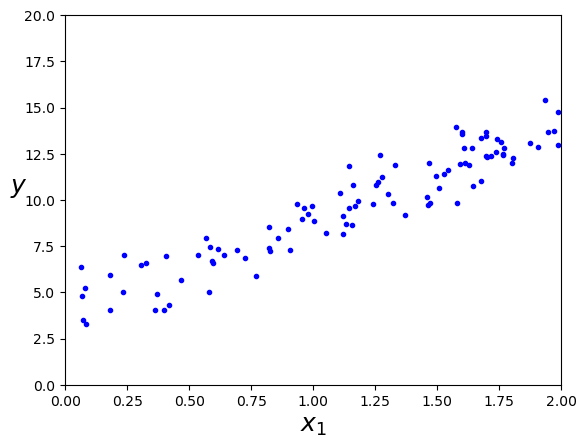

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 20])
plt.show()

## Estimation des paramètres 

In [3]:
#A compléter
X_b = np.c_[ np.ones((m, 1)), X] #ajouter X0=1 a chaque observation 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [4]:
theta_best

array([[3.8951287],
       [5.0419369]])

In [5]:
##X_new = np.array([[0], [2]]):on cree un tableau NumPy 'X_new'contenant deux nouvelles observation 0,2
#ces valeurs sseront utilisee pour effectuer des predictions
## y_predict = X_new_b.dot(theta_best) : Vous effectuez des prédictions en multipliant la matrice 
#X_new_b par les paramètres de la régression linéaire theta_best. 
#Cela donnera les valeurs prédites de y pour les nouvelles observations.

In [6]:
X_new = np.array([[0], [2]])  
X_new_b = np.c_[np.ones((2, 1)), X_new]  # ajout x0 = 1 à chaque observation cela prepare les données
                                         #pour effectuer des predictions
y_predict = X_new_b.dot(theta_best)
y_predict #pour effectuer des analyses ultérieures ou pour les afficher.

array([[ 3.8951287 ],
       [13.97900251]])

In [7]:
##plt.plot(X_new, y_predict, "r-") :trace la ligne de régression linéaire en utilisant les valeurs
# prédites y_predict pour les nouvelles observations X_new. La ligne est tracée en rouge ("r-")
# Cette ligne représente la prédiction du modèle de régression linéaire pour les valeurs de X_new.
##plt.plot(X, y, "b."): trace les points de données d'origine en utilisant les valeurs de X et y 
#Ces points sont affichés en bleu ("b."). Cela vous montre la distribution des données d'origine.

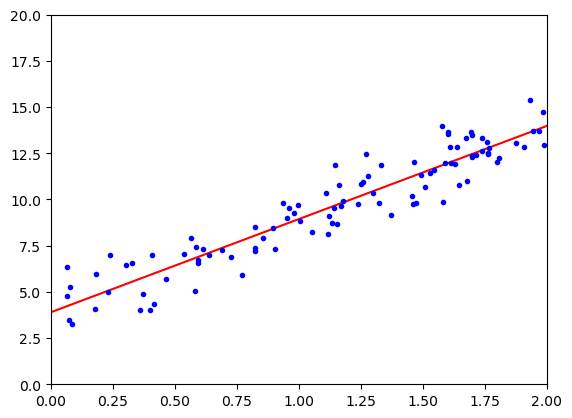

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 20])#Vous définissez les limites des axes du graphique. 
                       #L'axe des x est défini de 0 à 2, et l'axe des y est défini de 0 à 20.
plt.show() #affiche le graphique à l'écran, vous permettant de visualiser à la fois les points 
           #de données d'origine et la ligne de régression linéaire.

## Régression linéaire avec Scikit-Learn

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #Créer le modele de regression lineaire
lin_reg.fit(X, y) #Entrainez le modele de regression lineaire sur les données X et Y 
lin_reg.intercept_, lin_reg.coef_ #Récupère les coefficients de l'intercept 'qui correspond a b dans y=a*x+b'
                                  #et de la coefficients 'aui correspond a (a) de la pente

C:\Users\Hamza\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(array([3.8951287]), array([[5.0419369]]))

# Régression linéaire avec une descente de gradient
## Descente de gradient ordinaire

In [10]:
eta = 0.1  # learning rate / taux d'apprentissage
n_iterations = 1000


theta = np.random.randn(2,1)  # initialisation aléatoire

#A compléter
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # Calcul des gradients m:le nombre d'observations (lignes)
    theta = theta - eta * gradients  # met à jour les paramètres theta en utilisant la formule 
                                     #de la descente de gradient.

In [11]:
theta


array([[3.8951287],
       [5.0419369]])

In [12]:
X_new_b.dot(theta)  #pour calculer les prédictions du modèle de régression linéaire pour de nouvelles observations
                    #obtenir un vecteur contenant les valeurs prédites pour les nouvelles observations. 

array([[ 3.8951287 ],
       [13.97900251]])

In [13]:
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  #A compléter
        theta = theta - eta * gradients #A compléter
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0,30])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

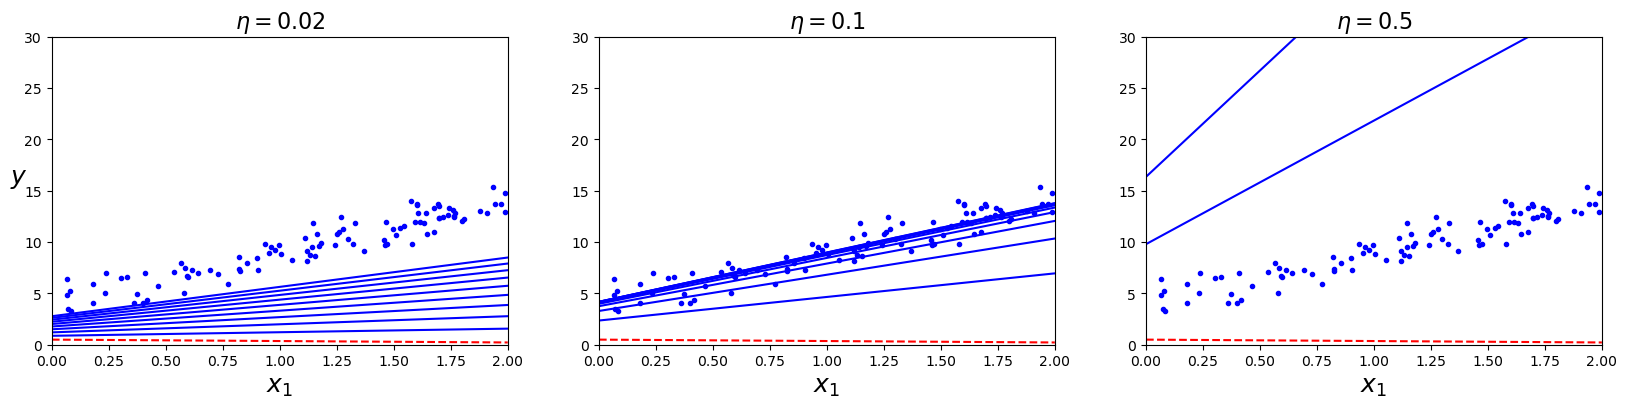

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1)  # initialisation aléatoire

plt.figure(figsize=(20,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [15]:
##  Ces prédictions sont tracées pour les dix premières itérations avec un style différent 
#(les premières itérations en pointillés rouges et les suivantes en ligne continue bleue).

#Dans le premier sous-graphique (eta = 0.02), le taux d'apprentissage est relativement faible ;
#La courbe de la descente de gradient progresse lentement, mais de manière plus stable vers le minimum de la fonction de coût.
#Cela signifie que le modèle apprend de manière plus lente, mais avec une meilleure stabilité.

#Dans le deuxième sous-graphique (eta = 0.1), le taux d'apprentissage est modéré;
#La descente de gradient converge plus rapidement par rapport au premier sous-graphique;
#Cependant, il pourrait y avoir quelques oscillations autour du minimum, mais elles se stabilisent finalement.

#Dans le troisième sous-graphique (eta = 0.5), le taux d'apprentissage est relativement élevé;
#La descente de gradient converge très rapidement vers le minimum, mais avec des oscillations plus prononcées;
#Ces oscillations peuvent rendre la convergence moins stable, et il est possible de dépasser le minimum de la fonction de coût.

#La différence principale réside dans la rapidité de convergence et la stabilité de la descente 
#de gradient. Un taux d'apprentissage faible garantit une convergence plus lente mais plus stable, 
#tandis qu'un taux d'apprentissage élevé accélère la convergence au risque de perturber la stabilité. 
#Le choix du taux d'apprentissage dépend du problème spécifique et peut nécessiter des essais pour 
#déterminer la meilleure valeur.La différence principale réside dans la rapidité de convergence et 
#a stabilité de la descente de gradient. Un taux d'apprentissage faible garantit une convergence plus 
#lente mais plus stable, tandis qu'un taux d'apprentissage élevé accélère la convergence au risque de
#perturber la stabilité. Le choix du taux d'apprentissage dépend du problème spécifique et peut 
#nécessiter des essais pour déterminer la meilleure valeur.

## Descente de gradient stochastique

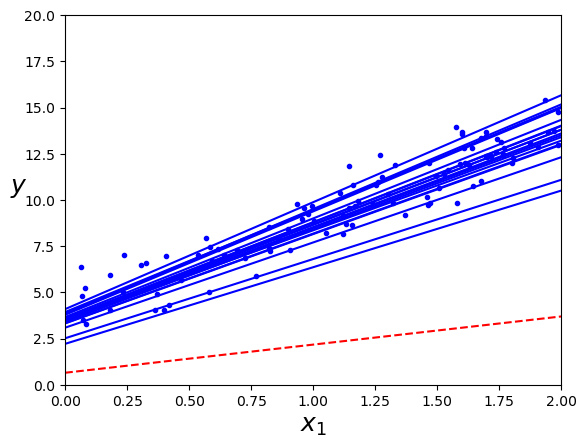

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 20])                              
plt.show()                                           

In [17]:
theta

array([[3.83204188],
       [4.99372397]])

# Descente de gradient par mini-lots (mini-batch gradient descent)

In [18]:
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
       

In [19]:
theta

array([[3.89866573],
       [5.04578536]])

# Régression polynomiale
y=ax^2+bx+c+bruit

In [20]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [21]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
a=0.5
b=1
c=2

y = a * X**2 + b* X + c + np.random.randn(m, 1)

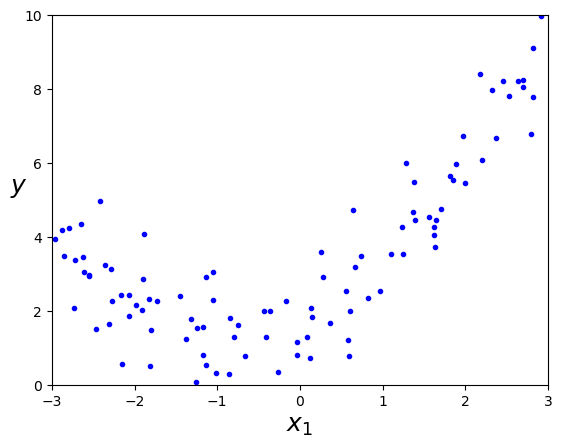

In [22]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [24]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

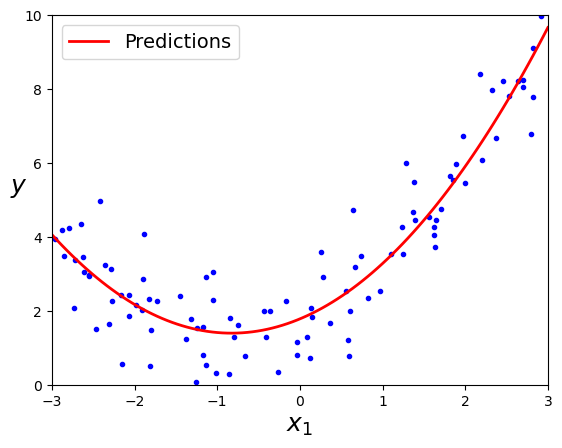

In [26]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# Sur-ajustement/sous-ajustement 
## courbes d'apprentissage

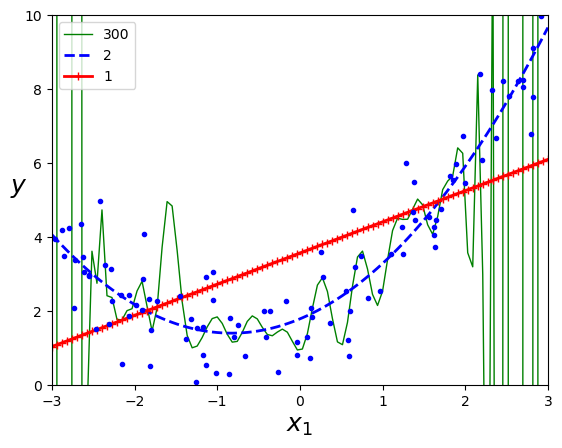

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

## Régression linéaire     

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

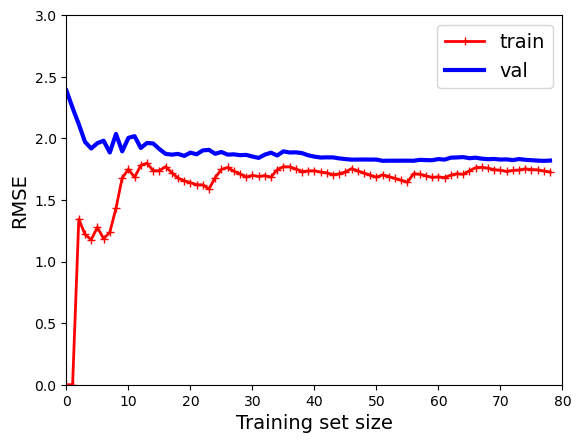

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.show()

Que remarquez-vous?

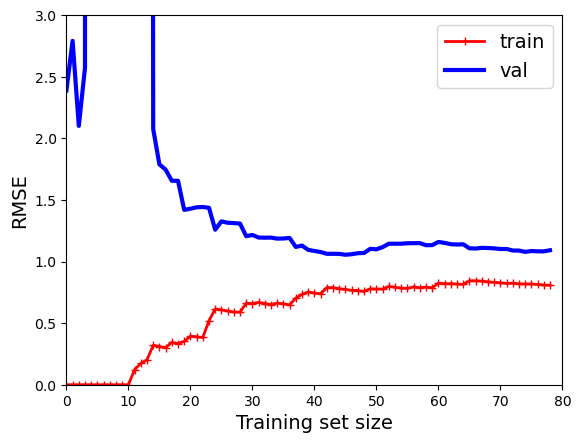

In [30]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()                        

Que remarquez-vous?

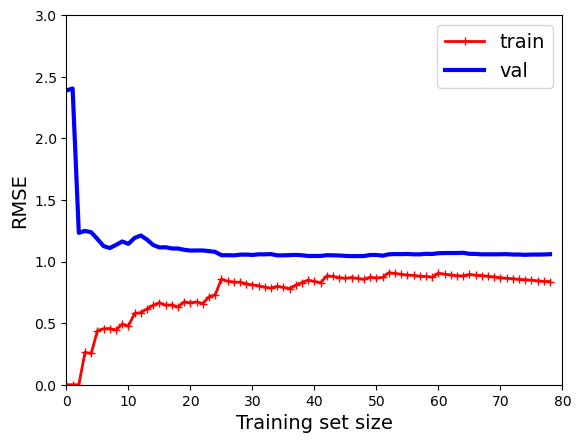

In [31]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
plt.show()   